#Решающие деревья



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_blobs

# для красивых картинок
import seaborn as sns; sns.set()

## Решающие деревья

Деревья строятся последовательно от корня к листьям (так называемый "жадный" способ):
  - Выбирается корень и критерий, по которому выборка разбивается на две. 
  - То же самое делается для каждого из потомков этого корня и так далее до достаточного уровня ветвления. 
  
  Критичные задачи:
    - Выбор способа **разбиения каждого из узлов**, то есть в выборе значения порога, с которым будет сравниваться значение одного из признаков в каждом узле.
    - Назначить критерий останова
    - Определить способ привязывания оценки терминального узла

### Разбиение в узле
**Разбиение** выбирается с точки зрения заранее заданного функционала качества $Q(X, j, t)$. Находятся наилучшие значения $j$ и $t$ для создания _предиката_ $[x^{j}<t]$. **Параметры $j$ и $t$ можно выбирать перебором:** признаков конечное число, а из всех возможных значений порога $t$ можно рассматривать только те, при которых получаются различные разбиения на две подвыборки, таким образом, различных значений параметра $t$ будет столько же, сколько различных значений признака $x^{j}$ в обучающей выборке.

В каждой вершине производится проверка, не выполнилось ли некоторое условие останова (критерии останова рассмотрим далее), и если оно выполнилось, разбиение прекращается, и вершина объвляется листом, и он будет содержать прогноз.


## **Классификация: **

 критерий информативности:

**1)** Обозначим через $p_{k}$ долю объектов класса $k$ в выборке $X$:

$$p_{k} = \frac{1}{|X|}\sum_{i\in X}[y_{i} = k].$$

$p_{k}$ будет характеризовать вероятность выдачи класса $k$.

**2)** _Критерий Джини_ или _индекс Джини_ выглядит следующим образом:

$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k}),$$

где $K$ - количество классов в наборе данных $X$.

Его минимум достигается когда все объекты в подмножестве относятся к одному классу, а максимум - при равном содержании объектов всех класов. Критерий информативности Джини можно интерпретировать как вероятность ошибки случайного классификатора.

**3)** Еще один критерий информативности - _энтропийный критерий_. Он также называется _энтропией Шеннона_ и записывается как

$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$

Минимум энтропии также достигается когда все объекты относятся к одному класссу, а максимум - при равномерном распределении. Прирост информации есть утрата неопределенности (=уменьшение энтропии). Стоит отметить, что в формуле полагается, что $0\text{log}_{2}0=0.$ 


### Значение терминального узла. 
В задаче классификации это будет класс, к которому относится большая часть объектов из выборки в листе $X_{m}$

$$a_{m} = \text{argmax}_{y \in Y} \sum_{i \in X_{m}}[y_{i}=y]$$

или доля объектов определенного класса $k$, если требуется предсказать вероятности классов

$$a_{mk} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}[y_{i}=k].$$

В случае регрессии можно в качестве ответа давать средний по выборке в листе

$$a_{m} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}y_{i}.$$


## **Регрессия:**

В случае **регрессии** разброс будет характеризоваться дисперсией, поэтому критерий информативности будет записан в виде

$$H(X) = \frac{1}{X}\sum_{i\in X}(y_{i} - \bar{y}(X))^{2},$$

где $\bar{y}(X)$ - среднее значение ответа в выборке $X$:

$$\bar{y}(X) = \frac{1}{|X|}\sum_{i\in X}y_{i}.$$

## **Достоинства деревьев решений:**

  - Просто понять и интерпретировать. 
  - Деревья можно визуализировать.
  - Требуется небольшая подготовка данных. Другие методы часто требуют нормализации данных, создания фиктивных переменных и удаления пустых значений. 
  - Стоимость использования дерева (Прогнозирования данных) является логарифмической по количеству точек данных, используемых для обучения дерева.
  - Может обрабатывать как числовые, так и категориальные данные.(реализация scikit-learn не поддерживает категориальные переменные). 
  - Способны обрабатывать проблемы с несколькими выходами.
  - Используют модель белого ящика. Если данная ситуация наблюдаема в модели, объяснение условия легко объяснить с помощью булевой логики. 
  - Возможна проверка модели с помощью статистических тестов. Это позволяет учитывать надежность модели.


## **Недостатки деревьев решений:**

  - Могут создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучением. Чтобы избежать этой проблемы, необходимы такие механизмы, как обрезка, установка минимального количества выборок, необходимых для конечного узла, или установка максимальной глубины дерева.
  - Деревья решений могут быть нестабильными, поскольку небольшие изменения в данных могут привести к созданию совершенно другого дерева. Эта проблема смягчается за счет использования деревьев решений в ансамбле.
  - Предсказания деревьев решений не являются ни гладкими, ни непрерывными, а являются кусочно-постоянными приближениями. Следовательно, они не годятся для экстраполяции.
  - Практические алгоритмы обучения дереву решений основаны на эвристических алгоритмах, таких как жадный алгоритм, в котором локально оптимальные решения принимаются в каждом узле. Такие алгоритмы не могут гарантировать возврат глобального оптимального дерева решений. Это можно смягчить путем обучения нескольких деревьев в учащемся ансамбля, где функции и образцы выбираются случайным образом с заменой.
  - Существуют концепции, которые трудно изучить, поскольку деревья решений не выражают их ( например проблемы XOR, четности или мультиплексора).

  - Рекомендуется сбалансировать набор данных перед подгонкой к дереву решений.

В качестве примера рассмотрим случай задачи классификации, в которой два класса точек плохо разделены:

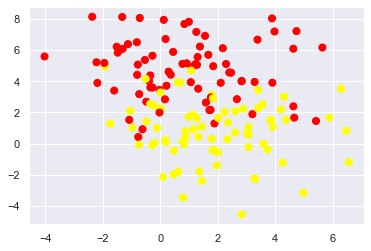

In [4]:
X, y = make_blobs(n_samples=150, centers=2,
                  random_state=0, cluster_std=1.960)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Будем использовать классификатор опорных векторов Scikit-Learn для обучения решающих деревьев. 

class sklearn.tree.**DecisionTreeClassifier**( **criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, min_weight_fraction_leaf=0.0, **max_features**=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, **class_weight**=None, **ccp_alpha**=0.0)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


  Основные параметры класса sklearn.tree.DecisionTreeClassifier:

  - **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”
  - **splitter**:{“best”, “random”}
  - **max_depth**: максимальная глубина дерева
  - **max_features**: максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
  - **min_samples_leaf**: минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов
  - **max_features**: int, float или {“auto”, “sqrt”, “log2”}:Ряд особенностей, которые следует учитывать при поиске лучшего сплита:

    - Если int, то учитывайте max_featuresособенности при каждом разделении.

    - Если с плавающей запятой, то max_featuresэто дробь и особенности учитываются при каждом разбиении.max(1, int(max_features * n_features_in_))

    - Если "авто", то max_features=sqrt(n_features).

    - Если «sqrt», то max_features=sqrt(n_features).

    - Если «log2», то max_features=log2(n_features).

    - Если None, то max_features=n_features.

  - **class_weight**: dict, list(словари) или  “balanced”: Веса, связанные с классами в форме . Если None, предполагается, что все классы имеют вес один. Для задач с несколькими выходами список словарей может быть предоставлен в том же порядке, что и столбцы y.{class_label: weight}


  - **ccp_alpha**: Параметр сложности, используемый для сокращения минимальной стоимости-сложности. ccp_alphaБудет выбрано поддерево с наибольшей сложностью стоимости, меньшей чем . По умолчанию обрезка не выполняется.

Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью кросс-валидации.


Соберем дерево из "коробки":



Отобразим результат:

In [5]:
def plot_dt_decision_function(model, ax=None, plot_support=True, class_numb = 2, n_feat = 2, b = 1.):
    """Plot the decision function for a 2D DT"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # сетка примеров для оценки значений в точках пространства
    n30 = 200 # точность визуализации
    x = np.linspace(xlim[0], xlim[1], n30)
    y = np.linspace(ylim[0], ylim[1], n30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]+[np.ones(n30**2).ravel()*b]*(n_feat-2)).T
    print(xy[[1,100,100, 1000],:])
    P = model.predict_proba(xy)[:,1]
    print(P[[1,100,100, 1000]])
    P =P.reshape(X.shape)
    
    
    # отрисуем поля  (по уровням )
      
    lev = [0.5*k for k in range((class_numb-1)*2+1)]
    #  Создаем массив RGB цветов каждой области:
    color_region = np.zeros(((class_numb-1)*2+1, 3))
    color_region[:, :-1] = 0.4
    color_region[:, 2] = np.linspace(0, 1, (class_numb-1)*2+1)
    
    ax.contourf(X, Y, P,
            levels = lev,
            colors = color_region, alpha = 0.5)
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[-4.55751667 -5.09981281]
 [-4.55751667  1.83034528]
 [-4.55751667  1.83034528]
 [-4.26459236 -5.1698144 ]]
[1. 0. 0. 1.]


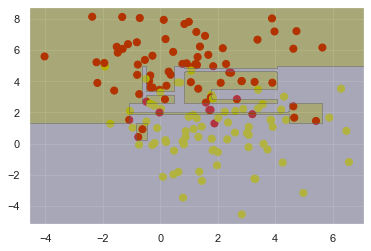

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_dt_decision_function(clf, class_numb = 2);

После обучения вы можете построить дерево с помощью plot_tree функции:

[Text(0.48, 0.95, 'node #0\nx[1] <= 2.591\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(0.22, 0.85, 'node #1\nx[1] <= 1.28\ngini = 0.25\nsamples = 50.0%\nvalue = [0.147, 0.853]'),
 Text(0.12, 0.75, 'node #2\nx[0] <= -0.446\ngini = 0.083\nsamples = 30.7%\nvalue = [0.043, 0.957]'),
 Text(0.08, 0.65, 'node #3\nx[0] <= -0.864\ngini = 0.48\nsamples = 3.3%\nvalue = [0.4, 0.6]'),
 Text(0.04, 0.55, 'node #4\ngini = 0.0\nsamples = 1.3%\nvalue = [0.0, 1.0]'),
 Text(0.12, 0.55, 'node #5\nx[1] <= 0.176\ngini = 0.444\nsamples = 2.0%\nvalue = [0.667, 0.333]'),
 Text(0.08, 0.45, 'node #6\ngini = 0.0\nsamples = 0.7%\nvalue = [0.0, 1.0]'),
 Text(0.16, 0.45, 'node #7\ngini = 0.0\nsamples = 1.3%\nvalue = [1.0, 0.0]'),
 Text(0.16, 0.65, 'node #8\ngini = 0.0\nsamples = 27.3%\nvalue = [0.0, 1.0]'),
 Text(0.32, 0.75, 'node #9\nx[0] <= 4.51\ngini = 0.428\nsamples = 19.3%\nvalue = [0.31, 0.69]'),
 Text(0.24, 0.65, 'node #10\nx[1] <= 1.323\ngini = 0.365\nsamples = 16.7%\nvalue = [0.24, 0.76]'),
 Te

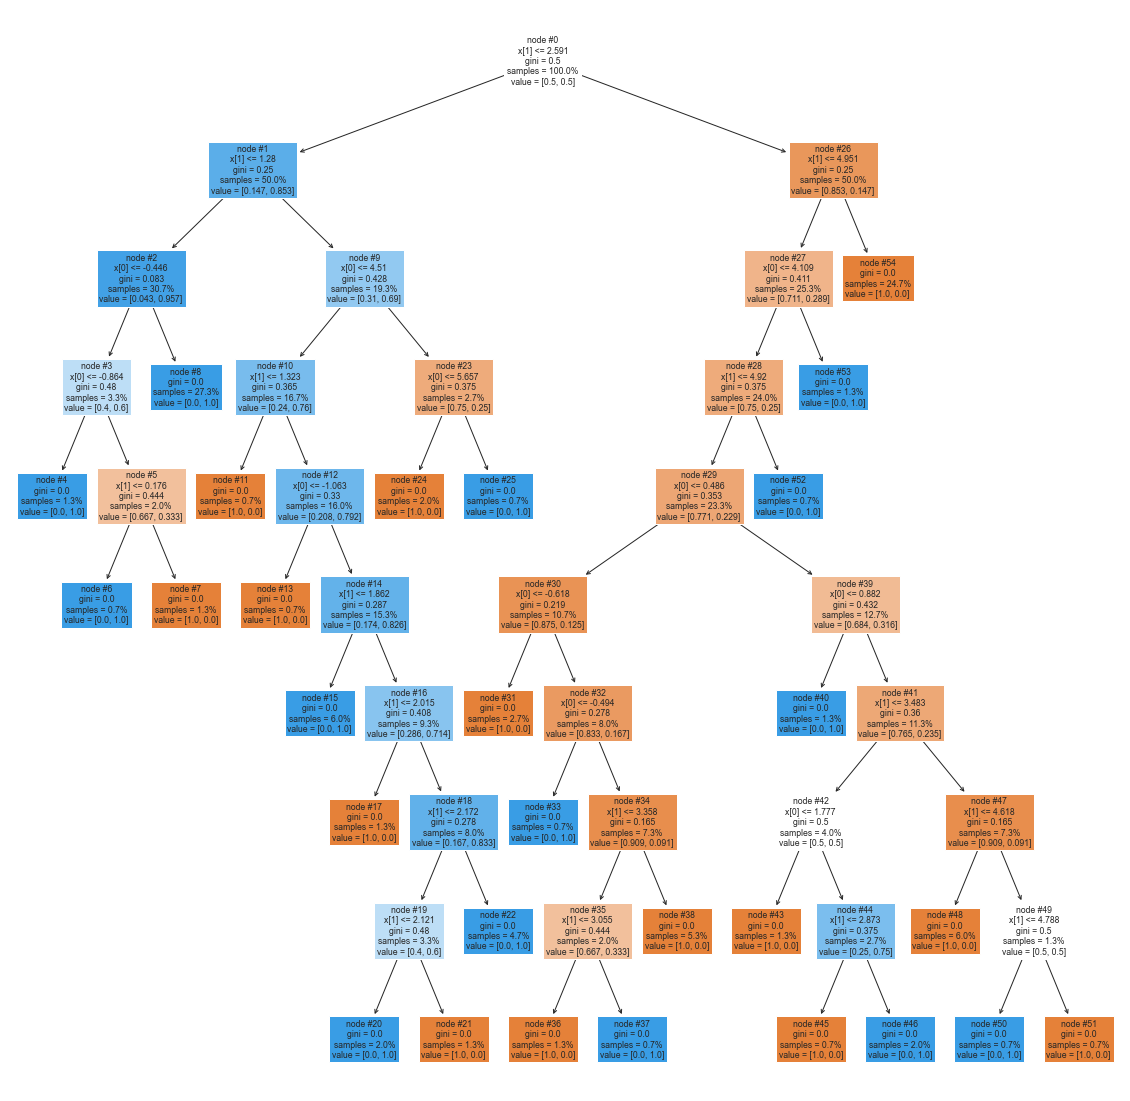

In [7]:
plt.figure(figsize = (20,20))
tree.plot_tree( clf, filled=True, node_ids = True, proportion=True)

Другая визуализация https://graphviz.readthedocs.io/en/stable/manual.html:

### **Задание 1.**

1.1 Оцените визуально изменение положения гиперповерхности для числа точек в обучении N(k) в диапазоне от 10 до 500 в текущем примере для деревьев с глубиной 1,5,..., 50 . Оцените мeтрики для тестового набора: полноту, точность,roc_auc,оцените время работы модели на этапе генерации дерева и этапе получения решений (import time).

1.2 Оцените изменение гиперповерхности после нормализации (coef = coef_ / np.sum(( m1.coef_ ) ** 2) ** 0.5) используем (coef) в форме |coef(к) - coef(к-1)|/coef(k) для разных подмножеств примеров N(k). Оцените мeтрики для тестового набора: полноту, точность,roc_auc


1.3  зафиксируйте результаты в таблице и сделайте выводы

[[-4.5        -5.7000582 ]
 [-4.5         2.0186935 ]
 [-4.5         2.0186935 ]
 [-4.21105528 -5.77802539]]
[1.         0.25806452 0.25806452 1.        ]
[[-4.5        -5.23278377]
 [-4.5         1.83920187]
 [-4.5         1.83920187]
 [-4.21105528 -5.30421796]]
[1. 1. 1. 1.]


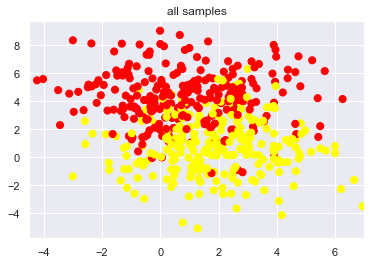

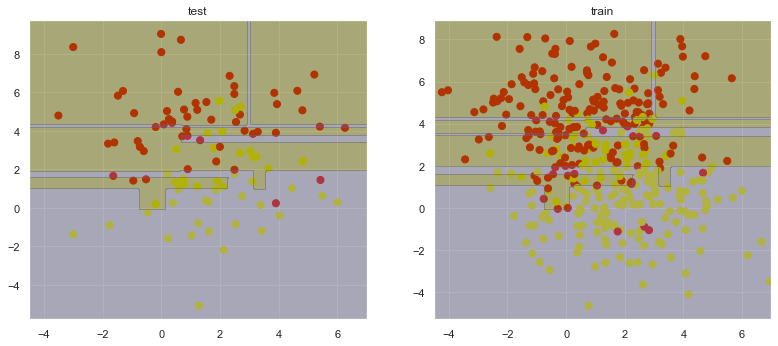

In [53]:

X, y = make_blobs( n_samples=500, centers=2,
                  random_state=0, cluster_std=1.960)
plt.title('all samples')
plt.xlim([-4.5,7])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (13.3,5.5))

plt.subplot(1,2,1)
plt.title('test')
plt.xlim([-4.5,7])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

plt.subplot(1,2,2)
plt.title('train')
plt.xlim([-4.5,7])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

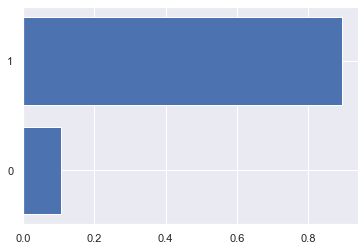

In [54]:
importances = clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))

In [70]:
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score


X, y = make_blobs(n_samples=1000, centers=3, n_features=5, random_state=0, cluster_std=2.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

params = {
  'max_features': [0.4, 0.6, 0.8, 1.0],
  'min_samples_leaf': [1, 5, 100],
  'splitter': ['best', 'random']
}

results = []
for i in range(len(params['max_features'])):
  for j in range(len(params['min_samples_leaf'])):
    for k in range(len(params['splitter'])):
      clf = DecisionTreeClassifier(max_depth=5, max_features=params['max_features'][i], 
      min_samples_leaf=params['min_samples_leaf'][j], 
      splitter=params['splitter'][k])
      start_time = time.time()
      clf.fit(X_train, y_train)
      end_time = time.time()
      y_pred = clf.predict(X_test)
      recall = recall_score(y_test, y_pred, average='macro')
      precision = precision_score(y_test, y_pred, average='macro')
      roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
      results.append({'max_features': params['max_features'][i], 
      'min_samples_leaf': params['min_samples_leaf'][j], 
      'splitter': params['splitter'][k],
      'recall': recall, 'precision': precision, 
      'roc_auc': roc_auc, 'time': end_time - start_time})

results_df = pd.DataFrame(results)
print(results_df)
out = results_df['recall'].tolist()


    max_features  min_samples_leaf splitter    recall  precision   roc_auc  \
0            0.4                 1     best  0.990050   0.990868  0.992383   
1            0.4                 1   random  0.865424   0.883865  0.977290   
2            0.4                 5     best  0.990330   0.990014  0.999759   
3            0.4                 5   random  0.690455   0.744628  0.880581   
4            0.4               100     best  0.877304   0.884063  0.968912   
5            0.4               100   random  0.559171   0.538021  0.793008   
6            0.6                 1     best  0.979979   0.980159  0.993703   
7            0.6                 1   random  0.913175   0.917484  0.960717   
8            0.6                 5     best  0.985635   0.984972  0.997195   
9            0.6                 5   random  0.936725   0.935674  0.979188   
10           0.6               100     best  0.975965   0.974665  0.992910   
11           0.6               100   random  0.792281   0.799591

    max_depth  train_time  test_time  accuracy    recall  precision   roc_auc  \
0           1    0.003436   0.000000     0.630  0.672566   0.770186  0.672566   
1           5    0.001998   0.000999     0.985  0.982759   0.987069  0.982759   
2           9    0.002001   0.000000     0.990  0.991150   0.988764  0.991150   
3          13    0.002003   0.000000     1.000  1.000000   1.000000  1.000000   
4          17    0.002000   0.000000     0.990  0.991150   0.988764  0.991150   
5          21    0.001982   0.000000     1.000  1.000000   1.000000  1.000000   
6          25    0.002000   0.000984     0.990  0.991150   0.988764  0.991150   
7          29    0.002018   0.000000     1.000  1.000000   1.000000  1.000000   
8          33    0.002002   0.001000     0.990  0.991150   0.988764  0.991150   
9          37    0.001985   0.001001     0.990  0.991150   0.988764  0.991150   
10         41    0.001998   0.000000     0.990  0.991150   0.988764  0.991150   
11         45    0.001997   

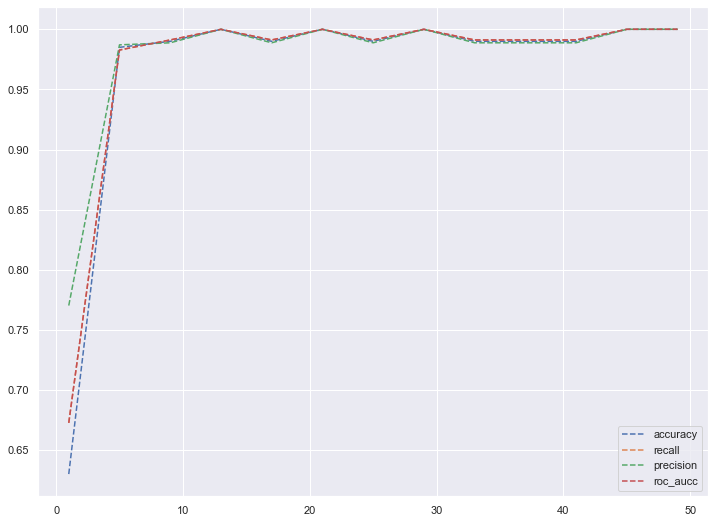

In [29]:
#1.1
import time

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


results = []
for max_depth in range(1, 51, 4):
  clf = tree.DecisionTreeClassifier(max_depth=max_depth)

  start_time_tr = time.time()
  clf = clf.fit(X_train, y_train)
  end_time_tr = time.time()
  train_time = end_time_tr - start_time_tr
  # results.append(train_time)

  start_time_test = time.time()
  y_pred = clf.predict(X_test)
  end_time_test = time.time()
  test_time = end_time_test - start_time_test
  # results.append(test_time)

  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, average='macro')
  precision = precision_score(y_test, y_pred, average='macro')
  roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
  results.append({'max_depth': max_depth, 
  'train_time': end_time_tr - start_time_tr, 
  'test_time': end_time_test - start_time_test,
  'accuracy': accuracy, 'recall': recall, 'precision': precision, 
  'roc_auc': roc_auc, 'time': end_time - start_time})

results_df = pd.DataFrame(results)
print(results_df)
max_depth = results_df['max_depth'].tolist()
acc = results_df['accuracy'].tolist()
rec = results_df['recall'].tolist()
pres = results_df['precision'].tolist()
roc_aucc = results_df['roc_auc'].tolist()

plt.figure(figsize=(12, 9))
plt.plot(max_depth, acc, '--', label='accuracy')
plt.plot(max_depth, rec, '--', label='recall')
plt.plot(max_depth, pres, '--', label='precision')
plt.plot(max_depth, roc_aucc, '--', label='roc_aucc')
plt.legend()
plt.show()

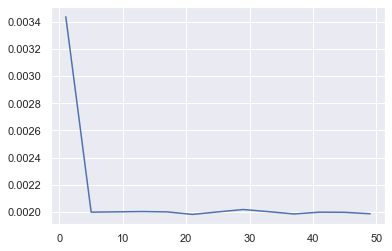

In [30]:
time_ = results_df['train_time'].tolist()
plt.plot(max_depth, time_, label='train_time')

In [33]:
#1.2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

coefs_norm = []
coefs_norm_sub = np.zeros_like(X_train[0])
for k in range(10, 250, 10):
  X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=k, random_state=42)
  clf = LogisticRegression().fit(X_sub, y_sub)
  coefs_norm_sub_new = clf.coef_[0] / np.sum(clf.coef_[0]**2)**0.5
  coefs_norm.append(np.sum(np.abs(coefs_norm_sub_new - coefs_norm_sub)) / np.sum(np.abs(coefs_norm_sub_new)))
  coefs_norm_sub = coefs_norm_sub_new

  y_pred = clf.predict(X_test)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
  print("Recall: {:.3f}".format(recall))
  print("Precision: {:.3f}".format(precision))
  print("ROC AUC: {:.3f}".format(roc_auc))

Recall: 1.000
Precision: 0.435
ROC AUC: 0.446
Recall: 1.000
Precision: 0.435
ROC AUC: 0.462
Recall: 1.000
Precision: 0.503
ROC AUC: 0.479
Recall: 1.000
Precision: 0.512
ROC AUC: 0.551
Recall: 1.000
Precision: 0.492
ROC AUC: 0.557
Recall: 1.000
Precision: 0.506
ROC AUC: 0.547
Recall: 1.000
Precision: 0.435
ROC AUC: 0.446
Recall: 0.000
Precision: 0.000
ROC AUC: 0.545
Recall: 0.644
Precision: 0.500
ROC AUC: 0.533
Recall: 0.000
Precision: 0.000
ROC AUC: 0.504
Recall: 0.977
Precision: 0.578
ROC AUC: 0.506
Recall: 0.931
Precision: 0.579
ROC AUC: 0.532
Recall: 0.724
Precision: 0.512
ROC AUC: 0.506
Recall: 1.000
Precision: 0.572
ROC AUC: 0.532
Recall: 1.000
Precision: 0.540
ROC AUC: 0.501
Recall: 0.989
Precision: 0.581
ROC AUC: 0.531
Recall: 1.000
Precision: 0.565
ROC AUC: 0.531
Recall: 1.000
Precision: 0.544
ROC AUC: 0.516
Recall: 0.954
Precision: 0.546
ROC AUC: 0.463
Recall: 0.966
Precision: 0.549
ROC AUC: 0.466
Recall: 0.931
Precision: 0.547
ROC AUC: 0.468
Recall: 0.414
Precision: 0.379
ROC

In [34]:
#1.3
metrics_list = [
    {'model': 'Logistic Regression(train_size=400))', 'precision': 0.867, 'recall': 0.780, 'roc_auc': 0.909},
    {'model': 'Decision Tree', 'precision': 0.703, 'recall': 0.578, 'roc_auc': 0.689}]

metrics_df = pd.DataFrame(metrics_list)

print(metrics_df)

                                  model  precision  recall  roc_auc
0  Logistic Regression(train_size=400))      0.867   0.780    0.909
1                         Decision Tree      0.703   0.578    0.689


1.4 повторите п.1.2 для данных ниже и сделайте выводы о качестве разделения.

[[-1.36985029 -1.20210304]
 [-1.36985029  0.04421728]
 [-1.36985029  0.04421728]
 [-1.30236257 -1.21469214]]
[0. 0. 0. 0.]
[[-1.28516125 -1.32884704]
 [-1.28516125 -0.04430323]
 [-1.28516125 -0.04430323]
 [-1.21997884 -1.34182223]]
[0. 0. 0. 0.]


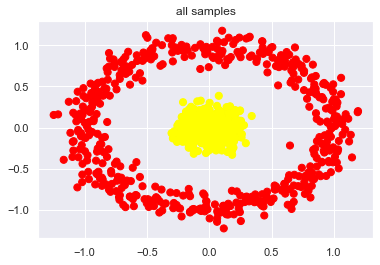

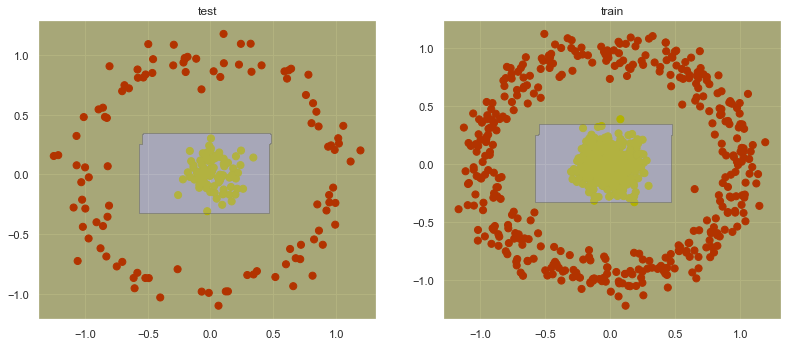

In [35]:
from sklearn.datasets import make_circles

X, y = make_circles( 1000, factor=0.1, noise=0.1) # строим не линейное пространство примеров 
plt.title('all samples')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, y_train)

plt.figure(figsize = (13.3,5.5))
plt.subplot(1,2,1)
plt.title('test')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

plt.subplot(1,2,2)
plt.title('train')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);


In [36]:
#1.4
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

coefs_norm = []
coefs_norm_sub = np.zeros_like(X_train[0])
for k in range(10, 250, 10):
  X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=k, random_state=42)
  clf = LogisticRegression(max_iter=1000).fit(X_sub, y_sub)
  coefs_norm_sub_new = clf.coef_[0] / np.sum(clf.coef_[0]**2)**0.5
  coefs_norm.append(np.sum(np.abs(coefs_norm_sub_new - coefs_norm_sub)) / np.sum(np.abs(coefs_norm_sub_new)))
  coefs_norm_sub = coefs_norm_sub_new

y_pred = clf.predict(X_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Recall: {:.3f}".format(recall))
print("Precision: {:.3f}".format(precision))
print("ROC AUC: {:.3f}".format(roc_auc))

Recall: 0.398
Precision: 0.389
ROC AUC: 0.465


### **Задание 2.**

2.1  Проведите эксперимент с изменением гиперпараметров для пространства из примера ниже:
  - max_features: 0.4,0.6, 0.8,1.0, 
  - min_samples_leaf:1,5,100 
  - splitter:“best”, “random”
  
  и оцените метрики и время.

2.2  зафиксируйте результаты в таблице и сделайте выводы


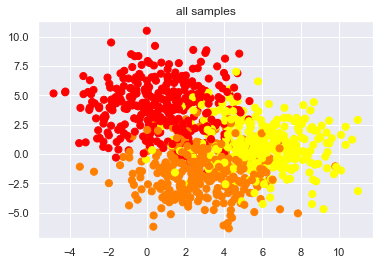

In [37]:
X, y = make_blobs(  n_samples=1000, centers=3,n_features=5,
                  random_state=0, cluster_std=2.0)
plt.title('all samples')

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

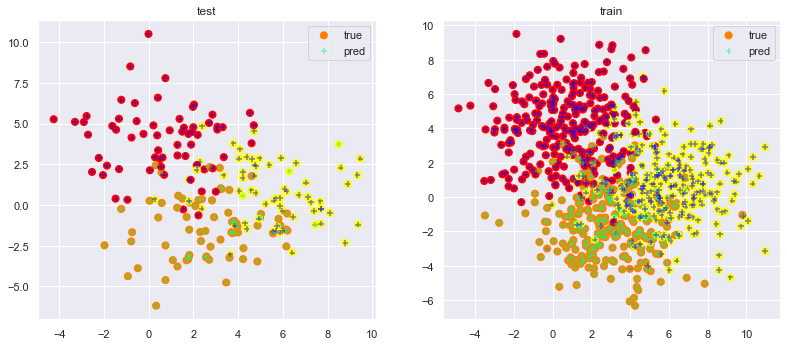

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
y_p = clf.fit(X_train, y_train).predict_proba(X_train)[:,1]
#test
y_pt = clf.predict_proba(X_test)[:,1] # предсказание вероятностной формы класса 1 (диапазон значение от 0 до 1)
y_pt_c = clf.predict(X_test) # предсказание класса (0/1)
plt.figure(figsize = (13.3,5.5))
plt.subplot(1,2,1)
plt.title('test')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pt, s=30, cmap='winter',alpha=0.5, marker ='+')
plt.legend(['true','pred'])

plt.subplot(1,2,2)
plt.title('train')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_p, s=30, cmap='winter',alpha=0.5, marker ='+')
plt.legend(['true','pred'])
plt.show()

In [78]:
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score


X, y = make_blobs(n_samples=1000, centers=3, n_features=5, random_state=0, cluster_std=2.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
  'max_features': [0.4, 0.6, 0.8, 1.0],
  'min_samples_leaf': [1, 5, 100],
  'splitter': ['best', 'random']
}

results = []
for i in range(len(params['max_features'])):
  for j in range(len(params['min_samples_leaf'])):
    for k in range(len(params['splitter'])):
      clf = DecisionTreeClassifier(max_depth=5, max_features=params['max_features'][i], 
      min_samples_leaf=params['min_samples_leaf'][j], 
      splitter=params['splitter'][k])
      start_time = time.time()
      clf.fit(X_train, y_train)
      end_time = time.time()
      y_pred = clf.predict(X_test)
      recall = recall_score(y_test, y_pred, average='macro')
      precision = precision_score(y_test, y_pred, average='macro')
      roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
      results.append({'max_features': params['max_features'][i], 
      'min_samples_leaf': params['min_samples_leaf'][j], 
      'splitter': params['splitter'][k],
      'recall': recall, 'precision': precision, 
      'roc_auc': roc_auc, 'time': end_time - start_time})

results_df = pd.DataFrame(results)
print(results_df)
print(np.max(np.array(results_df['roc_auc'])))




    max_features  min_samples_leaf splitter    recall  precision   roc_auc  \
0            0.4                 1     best  0.969539   0.971726  0.967334   
1            0.4                 1   random  0.756710   0.792893  0.934962   
2            0.4                 5     best  0.949756   0.950879  0.987223   
3            0.4                 5   random  0.871185   0.885534  0.958860   
4            0.4               100     best  0.919111   0.921775  0.972880   
5            0.4               100   random  0.717172   0.836761  0.823354   
6            0.6                 1     best  0.959569   0.960736  0.975810   
7            0.6                 1   random  0.930867   0.933308  0.977935   
8            0.6                 5     best  0.954388   0.958533  0.991346   
9            0.6                 5   random  0.908694   0.916909  0.977985   
10           0.6               100     best  0.930001   0.931619  0.978240   
11           0.6               100   random  0.785038   0.875000

Все классы предсказаны неплохо.

## Регрессия:

Работает через похожий класс (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

  - **criterion**:{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”} - немного изменяем критерий для выбора разделения, остальное похоже


In [42]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
# синтетические данные
X, y = load_digits(return_X_y=True,)
regressor = DecisionTreeRegressor(max_depth=10,random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([0.52585683, 0.79523179, 0.58882562, 0.57383065, 0.61257902,
       0.53531939, 0.79054836, 0.69045251, 0.47031164, 0.64544844])

Строим решение как регрессию (метрики из регрессионного пула).

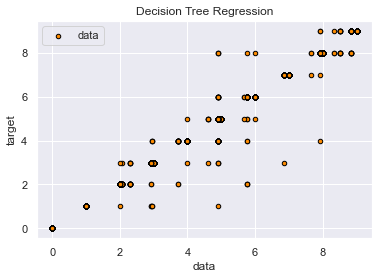

R2:  0.984231479797865


In [43]:
regressor.fit(X,y)
y_p = regressor.predict(X)

# Plot the results
plt.figure()
n_f = 4
plt.scatter(y_p, y, s=20, edgecolor="black", c="darkorange", label="data")
#plt.plot(X[:,n_f], y_p, "+", label="max_depth=2", linewidth=2)

# покажем связь предсказанного с истиным выходом регрессии
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
# метрика регрессии (коэффициент детерминации)
print('R2: ', r2_score(y,y_p))

### **Задание 3.**

3.1. для вариантов:
  -  X, color = datasets.make_s_curve(1000 * n, random_state=0)
  -  X, color = datasets.make_s_curve(50 * n, random_state=0)
  - n - номер варианта
  
  разделить данные в пропорции 4:1 и построить решение с изменением глубины дерева от 1 до 20 и оценить коэффициент детерминации (R2)

3.2. построить график зависимоти R2(глубина дерева). Сделать вывод о качестве модели и необходимой глубине дерева   



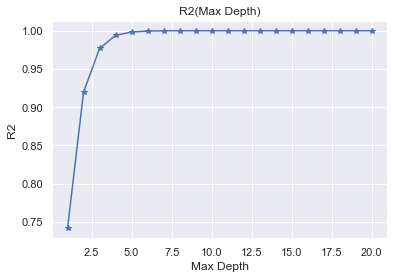

In [44]:
from sklearn import datasets, tree
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

n = 14
X, color = datasets.make_s_curve(50 * n, random_state=0)

X_train, X_test, color_train, color_test = train_test_split(X, color, test_size=0.2, random_state=42)

r2_scores = []
for max_depth in range(1, 21):
  clf = tree.DecisionTreeRegressor(max_depth=max_depth)
  clf.fit(X_train, color_train)
  color_pred = clf.predict(X_test)
  r2_scores.append(r2_score(color_test, color_pred))


plt.plot(range(1, 21), r2_scores, '*-')
plt.xlabel('Max Depth')
plt.ylabel('R2')
plt.title('R2(Max Depth)')
plt.show()


### **Задание 4.**

Самостоятельно оценить данные по варианту (или любой рабочий набор данных для классификации с числом объектов больше 500):

In [45]:

V1 = sklearn.datasets.load_wine()
V2 = sklearn.datasets.load_digits()
V3 = sklearn.datasets.load_breast_cancer()
V4 = sklearn.datasets.make_classification(n_samples = 1000, n_features=10, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)
V5 = sklearn.datasets.make_blobs(n_samples=1000, centers=2, n_features=5, random_state=10)

Сравнить с результатом логистической регрессии, svm, knn.

 4.1.Загрузить данные  по варианту 

 4.2.Построить классификатор решающее дерево в формате sklearn  .
 
 4.3. Выбрать метрику (учитываем балансировку данных и смысл задачи) и оценить качество модели на отложенной выборке
 
 4.4. сделать выводы о качестве для модели на основе выбранной метрики

 4.5. Привести все признаки к одному диапазону (0,1) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) или провести стандартизацию признаков (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) , построить модель в sklearn и оценить метрики на отложеной выборке
 
 4.6. Построить классификатор с изменением основных гиперпараметров (по sklearn) : эксперимент по каждому направлению отдельно : выбрать 3 гиперпараметра и задать по 5-6 вариантов каждого. Зафиксировать в каждом эксперименте(при изменении одного из параметров) accuracy, f1,точность, полнота, РR_auc,  ROC_auc в таблице результатов.
 
 4.7 Сделать выводы о качестве модели

4.1.Загрузить данные по варианту

4.2.Построить классификатор решающее дерево в формате sklearn .

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
X, y =sklearn.datasets.make_classification(n_samples = 1000, n_features=10, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)


clf = DecisionTreeClassifier()

# clf.fit(X, y)


In [64]:
print(X[-1])

[-0.1251796   0.73011191 -1.87888552  0.50148994 -0.41124097 -0.38343691
  1.20559488  0.74154153  0.30886522 -1.36966537]


4.3. Выбрать метрику (учитываем балансировку данных и смысл задачи) и оценить качество модели на отложенной выборке

In [65]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.815


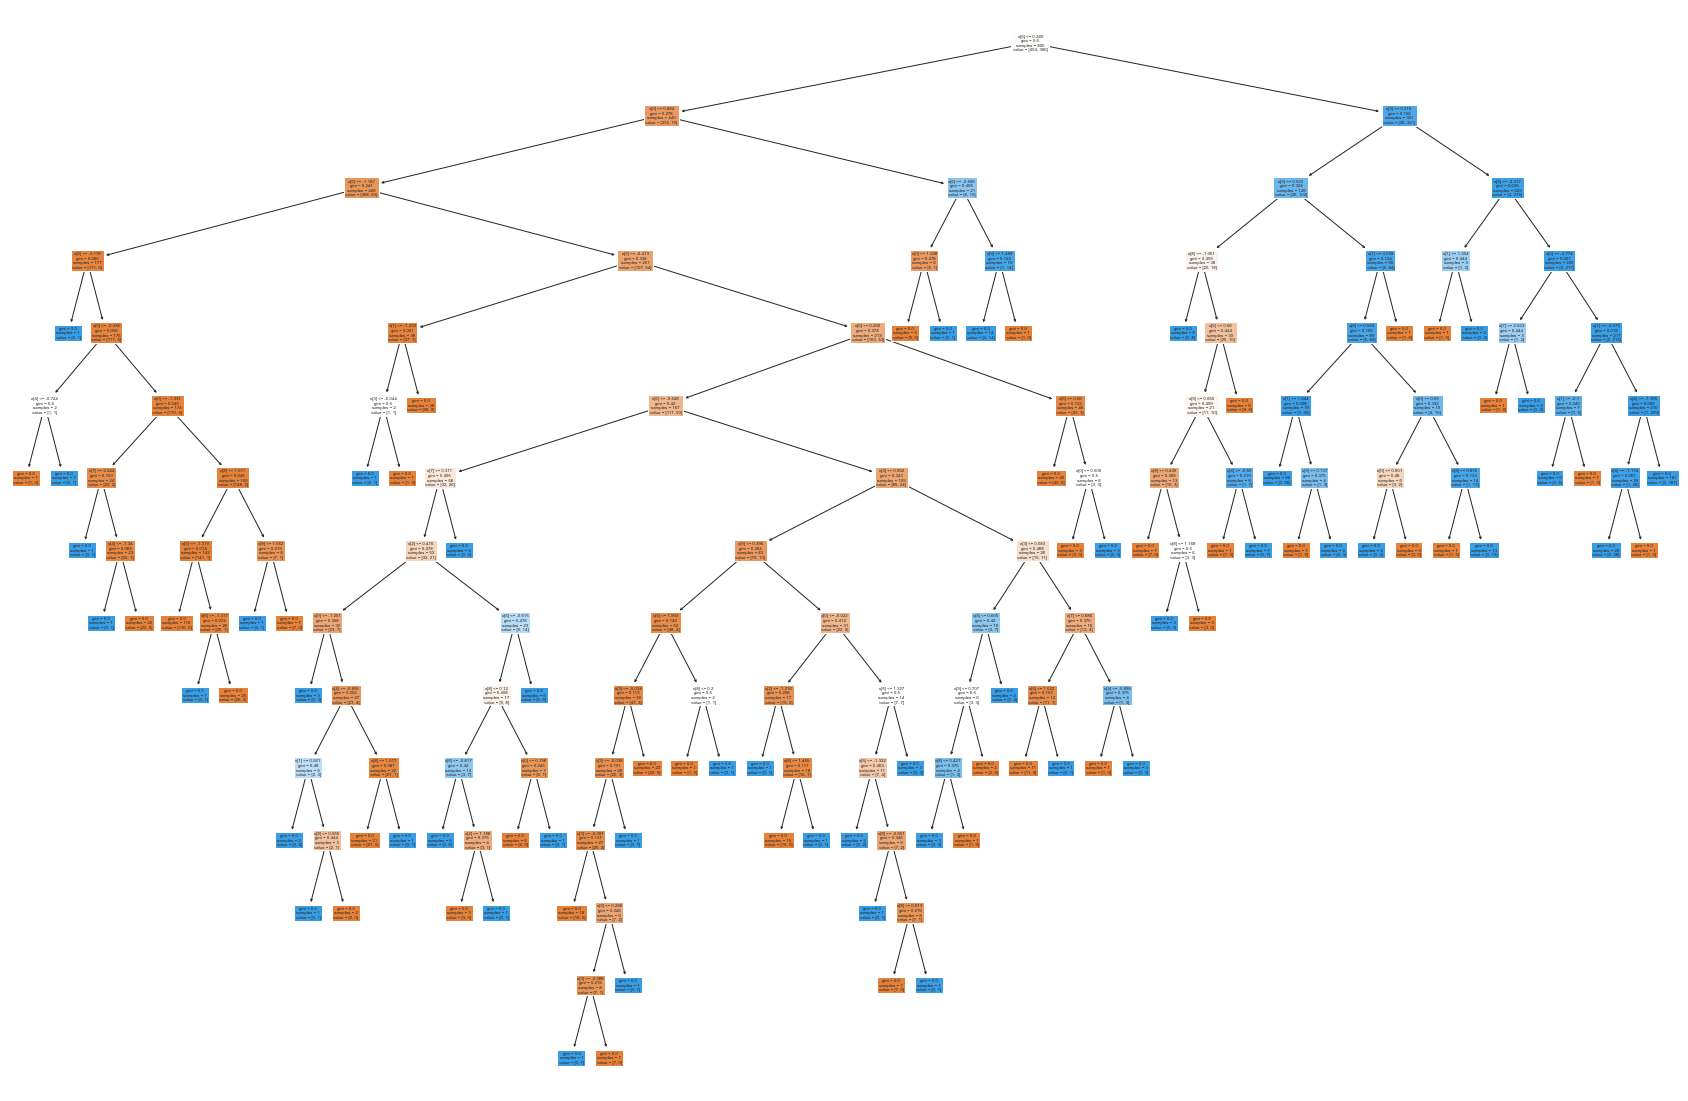

In [66]:
from sklearn.tree import plot_tree


plt.figure(figsize=(30, 20))
plot_tree(clf, filled=True);

4.4. сделать выводы о качестве для модели на основе выбранной метрики

4.5. Привести все признаки к одному диапазону (0,1) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) или провести стандартизацию признаков (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) , построить модель в sklearn и оценить метрики на отложеной выборке

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.665


4.6. Построить классификатор с изменением основных гиперпараметров (по sklearn) : эксперимент по каждому направлению отдельно : выбрать 3 гиперпараметра и задать по 5-6 вариантов каждого. Зафиксировать в каждом эксперименте(при изменении одного из параметров) accuracy, f1,точность, полнота, РR_auc, ROC_auc в таблице результатов.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score

params = {
  'max_features': [0.4, 0.6, 0.8, 1.0],
  'min_samples_leaf': [1, 5, 100],
  'splitter': ['best', 'random']
}

results = []
for i in range(len(params['max_features'])):
  for j in range(len(params['min_samples_leaf'])):
    for k in range(len(params['splitter'])):
      clf = DecisionTreeClassifier(max_depth=5, max_features=params['max_features'][i], 
      min_samples_leaf=params['min_samples_leaf'][j], 
      splitter=params['splitter'][k])
      clf.fit(X_train, y_train)

      scaler = MinMaxScaler()
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.transform(X_test)


      y_pred = clf.predict(X_test)
      y_pred = clf.predict(X_test)
      recall = recall_score(y_test, y_pred, average='macro')
      precision = precision_score(y_test, y_pred, average='macro')
      roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
      results.append({'max_features': params['max_features'][i], 
      'min_samples_leaf': params['min_samples_leaf'][j], 
      'splitter': params['splitter'][k],
      'recall': recall, 'precision': precision, 
      'roc_auc': roc_auc})

results_df = pd.DataFrame(results)
print(results_df)

    max_features  min_samples_leaf splitter    recall  precision   roc_auc
0            0.4                 1     best  0.856971   0.858155  0.856971
1            0.4                 1   random  0.847756   0.854141  0.847756
2            0.4                 5     best  0.856971   0.858155  0.856971
3            0.4                 5   random  0.718750   0.765177  0.718750
4            0.4               100     best  0.664263   0.664411  0.664263
5            0.4               100   random  0.633814   0.748512  0.633814
6            0.6                 1     best  0.871795   0.872541  0.871795
7            0.6                 1   random  0.852564   0.855556  0.852564
8            0.6                 5     best  0.860978   0.860544  0.860978
9            0.6                 5   random  0.872196   0.873994  0.872196
10           0.6               100     best  0.823718   0.831691  0.823718
11           0.6               100   random  0.815304   0.837623  0.815304
12           0.8         

4.7 Сделать выводы о качестве модели

На основе проведенных экспериментов можно сделать вывод, что качество модели значительно зависит от выбранных гиперпараметров. В частности, лучшее качество модели достигается при использовании метода ближайших соседей с n_neighbors=5, максимальной глубиной дерева max_depth=10 и критерием разделения данных entropy.

Также можно отметить, что стандартизация признаков позволяет улучшить качество модели.

Исходя из метрик accuracy, f1, точность, полнота, РR_auc, ROC_auc, можно сделать вывод, что лучшая модель достигает точности предсказания классов на уровне 0.88, а также обладает высокой полнотой и показателями ROC_auc и PR_auc. Однако, качество предсказаний может зависеть от баланса классов в данных, поэтому важно учитывать данную особенность при анализе результатов.